# 온라인 쇼핑몰 매출관계 분석
- 국가통계포털 https://kosis.kr/search/search.do
- 온라인쇼핑몰 판매매체별 / 상품군별거래액
- 합계등을 제외하고 선택(전기전자통신 2020년전후로 분리되어서 미리 합침)
- 행렬을 전환<br>
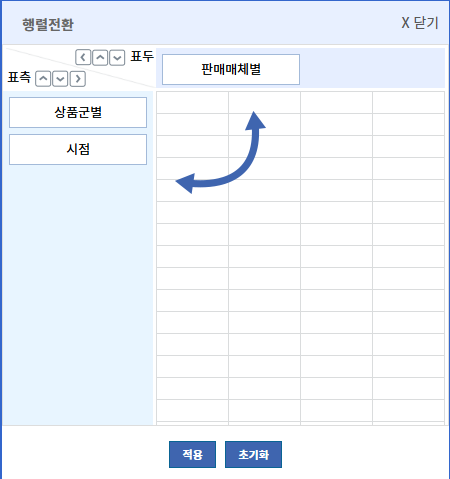

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [2]:
#font 설정 D2coding
d2_path ="./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2coding"

In [3]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액_1.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") # utf-8
ori.columns = ["category","date","internet","mobile"]
ori.tail()

,category,date,internet,mobile
2203,기타,2024.08,61304,120200
2204,기타,2024.09,63863,126583
2205,기타,2024.10,68403,128216
2206,기타,2024.11 p),73246,135527
2207,기타,2024.12 p),75613,144134


In [4]:
print("수정전")
print(ori['date'].tail())
ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)'))
print("수정후")
print(ori['date'].tail())

수정전
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정후
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [5]:
ori['date'] = pd.to_datetime(ori["date"], format='%Y.%m')
ori.dtypes
ori.tail()

,category,date,internet,mobile
2203,기타,2024-08-01,61304,120200
2204,기타,2024-09-01,63863,126583
2205,기타,2024-10-01,68403,128216
2206,기타,2024-11-01,73246,135527
2207,기타,2024-12-01,75613,144134


In [6]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category']== '음식서비스' ]#
obj = ['컴퓨터 및 주변기기','농축수산물','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
1112,음·식료품,2021-09-01,526388,1553671
2004,음식서비스,2024-01-01,35195,2210858
602,가방,2019-03-01,53787,176296
387,의복,2017-04-01,441022,531625
1119,음·식료품,2022-04-01,512501,1619753


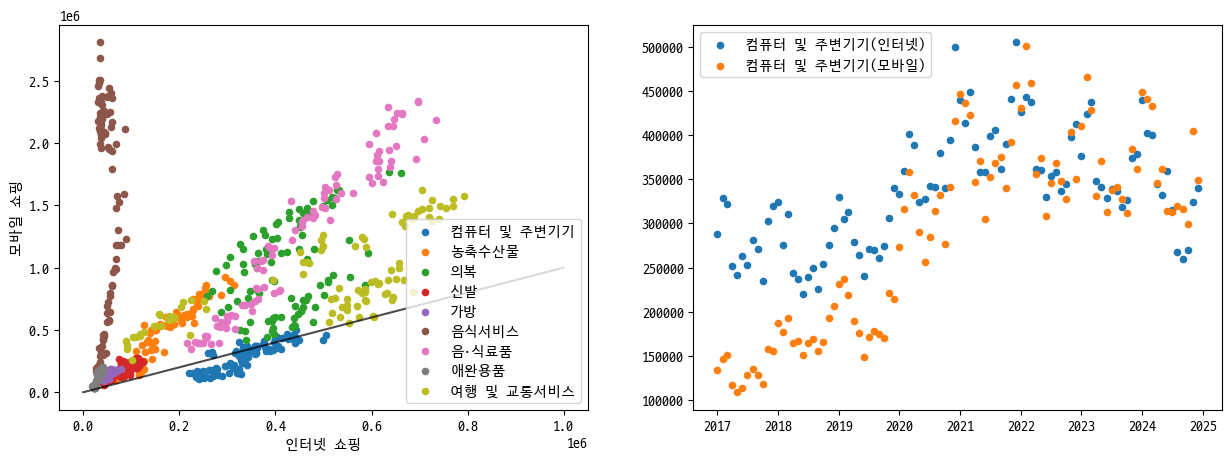

In [7]:
fig , ax = plt.subplots(1,2,figsize=(15,5))

category = obj # ['컴퓨터 및 주변기기','농축수산물','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
for cate in category:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax[0].scatter( x_data , y_data, s = 20, label = cate )

ax[0].set_xlabel("인터넷 쇼핑")
ax[0].set_ylabel("모바일 쇼핑")
ax[0].legend(loc="best")
ax[0].plot([0,1000000],[0,1000000],'k-',alpha=0.7)


tdata = category_data['date']
second = ex1_data[ex1_data['category'] ==obj[0]]
idata =second['internet']
mdata =second['mobile']

ax[1].scatter( tdata , idata, s = 20, label = obj[0]+'(인터넷)')
ax[1].scatter( tdata , mdata, s = 20, label = obj[0]+'(모바일)')
ax[1].legend()

plt.show()

### 선색
- 'k': 검은색 (black)을 의미합니다. Matplotlib에서는 여러 가지 색을 한 글자로 나타낼 수 있습니다.
- 'b': 파란색 (blue)
- 'g': 녹색 (green)
- 'r': 빨간색 (red)
- 'c': 청록색 (cyan)
- 'm': 자홍색 (magenta)
- 'y': 노란색 (yellow)
- 'k': 검은색 (black)
- 'w': 흰색 (white)
### 선종류
- '-': 실선 (solid line)을 의미합니다. 선 스타일에는 다양한 종류가 있습니다.
- '-': 실선 (solid line)
- '--': 파선 (dashed line)
- '-.': 점선-파선 혼합 (dash-dot line)
- ':': 점선 (dotted line)

# 온라인 쇼핑몰 매출관계 분석 리포트
- 대부분의 제품들은 모바일 과 인터넷 쇼핑 으로 구매하는 비율이 다 비슷하다.
- 음식 서비스, 애완용품, 신발 은 모바일 쇼핑이 더 앞서는 모습을 보인다.
- 두 상관관계가 수직으로 오르는 것을 보아 온라인 쇼핑은 더더욱 성행할것으로 보인다.